## 1. Numerical Error

## Part (a)
Write code to generate an array of length $N$, filled with random numbers from a Gaussian distribution (with mean $x$ and standard deviation $\sigma$), and make a histogram (with $m$ bins) of the array values. (You are encouraged to import functions from numpy and matplotlib.pyplot) Test this code, performing at least two sanity checks to make sure it's working properly.

[-1.63697593  1.19520493  0.21842849 ... -0.00207755 -0.27604725
  0.67166635]


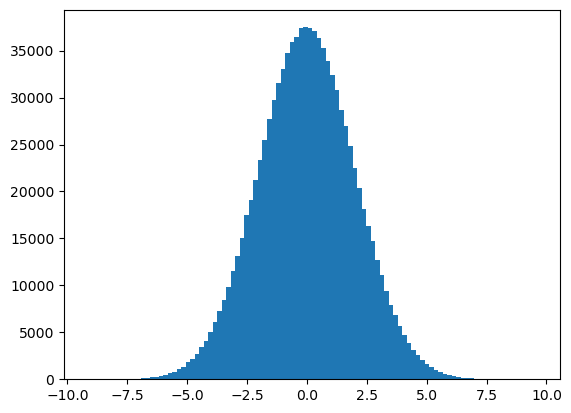

array([-1.63697593,  1.19520493,  0.21842849, ..., -0.00207755,
       -0.27604725,  0.67166635])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Global Setting Parameters
N = int(1e6)
BINS = 100


def gauss_array(n, mean, std, plot=False):
    """create a numpy array distrbuted as per a noramal distrbution

    Args:
        n (int): Length of array
        mean (float): Center to generate from
        std (float): Standard deviation of distribution
        plot (bool, optional): Whether to plot histogram. Defaults to False.

    Returns:
        _type_: _description_
    """
    # Generate array
    array = np.random.normal(loc=mean, scale=std, size=N)

    # Gut check array by visually examining values
    print(array)
    
    # Gut check by looking at histogram
    plt.hist(array, bins=BINS)
    plt.show()
    plt.close()
    
    return array

gauss_array(N, 0., 2.)



## Part (b)
Now write a function to: generate two arrays as in the previous part (where the first Gaussian has  $x_1,\sigma_1$ and the second Gaussian has $x_2,\sigma_2$), make a third array that is the element-wise sum of these two arrays, and make a histogram of the 'array values. The function should take $x_1,\sigma_1, x_2, \sigma_2$ as arguments.

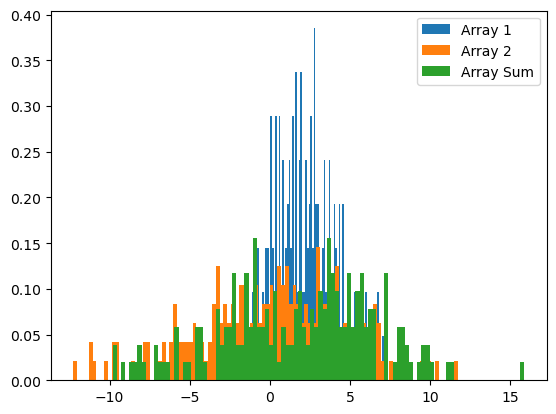

(array([ 2.58555543,  1.02641585,  2.90856788,  1.95616445,  3.02672767,
         3.3838979 ,  1.96317604,  2.76518232,  1.67554311,  1.48039722,
        -0.86883887,  2.83461221,  6.72930447, -1.91023913, -0.20378738,
        -0.14276098, -2.79185027,  4.14501777,  3.77302353,  3.5197202 ,
         0.28397728, -0.70333738,  0.2219589 ,  2.2148348 ,  1.7829945 ,
         1.88952173, -0.14310642,  1.8292501 , -1.8116553 ,  2.77384728,
        -2.28479935,  3.46330866,  0.28663171,  3.59497532,  2.8541856 ,
         7.10362319,  4.30574537, -0.26369461,  4.53693978,  3.40489   ,
        -0.77899235,  1.82013589,  1.28846346,  2.30365682,  0.11735411,
         2.29807126, -2.20462629, -0.16961198,  2.22925131,  2.32207874,
        -1.36854569,  2.01790033,  4.27151398,  1.49199254,  1.52004139,
         3.00491915,  1.69723842,  3.68063712, -1.03526006,  2.65669655,
        -0.75612028,  4.75353746, -2.09185902,  1.50891211,  3.10690793,
         0.85931597,  1.06039312,  0.81366827, -0.0

In [7]:
mean_1 = 2
std_1 = 2
mean_2 = 0
std_2 = 5

def dual_gauss_array(n, x1, x2, std1, std2, plot=False):
    """Generates two arrays distrubuted as per a normal distrubution

    Args:
        n (int): length of arrays
        x1 (float): mean of array 1
        x2 (float): meand of array 2
        std1 (float): standard deviation of array 1
        std2 (float): standard deviation of array 2
        plot (bool, optional): Whether to plot histogram. Defaults to False.
    """

    array_1 = np.random.normal(loc=x1, scale=std1, size=N)
    array_2 = np.random.normal(loc=x2, scale=std2, size=N)
    
    array_sum = array_1 + array_2
    
    # Allows reuability without always running plotting function,
    # defaults to not plotting if not specified
    if plot:
        plt.hist(array_1, label="Array 1", 
                 histtype='stepfilled', bins=BINS, density=True)
        plt.hist(array_2, label="Array 2", 
                 histtype='stepfilled', bins=BINS, density=True)
        plt.hist(array_sum, label="Array Sum", 
                 histtype='stepfilled', bins=BINS, density=True)
        
        plt.legend()
        plt.show()
        plt.close()

    return array_1, array_2, array_sum

dual_gauss_array(N, mean_1, mean_2, std_1, std_2, plot=True)


## Part (c)

Recall from your physics labs, when you make repeated measurements of a quantity, the measurements follow a Gaussian distribution, where the mean (hopefully) represents the 'true' value of the quantity and the standard deviation represents the statistical uncertainty (error) on the measurement. 
If you make repeated measurements of two different quantities, and use these two quantities to calculate a third quantity, the error propagates, so you have to use error propagation formulas to figure out the uncertainty on the third quantity.

Numerical errors in calculations propagate in a similar manner. We can represent the numerical error on stored value $x$ as $\sigma$, and define our fractional error constant as $C$ such that $\sigma = C |x|$.

Plugging this into the previous part, we get $\sigma_1 = C |x_1|, \sigma_2 = C |x_2|$. Try this with: $N=10^6, m=100, C=10^{-14}, x_1 = 100, x_2 = -100$. (For the purposes of this exercise, we're using a much larger value of $C$ than the machine precision, so that we can see its effect.) Now try again with different mean values: $x_1 = 1.0, x_2 = -1.0$

Hopefully, you now see visually why adding a positive number to a negative number, where both have large absolutely values, can produce large errors.

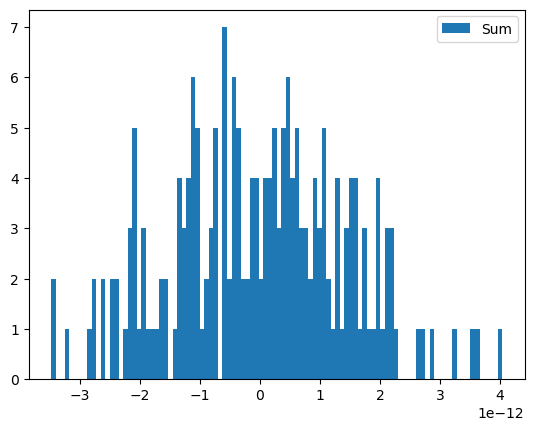

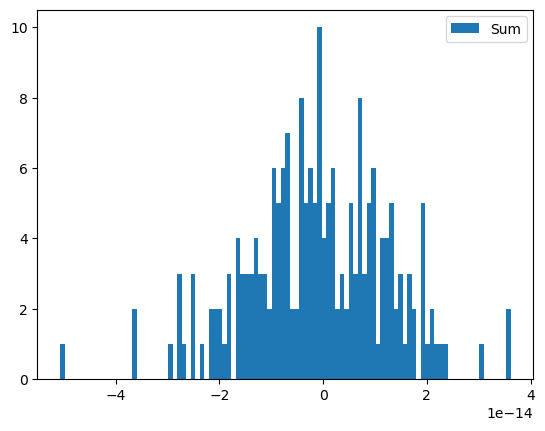

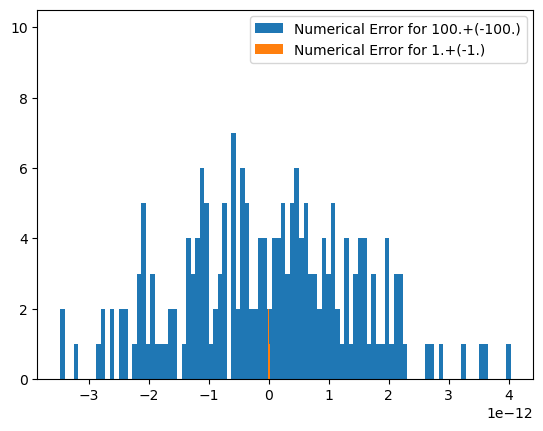

In [9]:
# Intialize parameters
mean_1_a = 100. # Positive generation mean for first part of (c)
mean_2_a = -100. # Positive generation mean for first part of (c)
mean_1_b = 1. # Negative generation mean for second part of (c)
mean_2_b = -1. # Negative generation mean for second part of (c)
c = 1e-14 #machine epsilon

def numerical_error_visualization(n, mean1, mean2, c, num_bins, plot=False):
    """Visualizes numerical error when adding a postive number to a negative 
    number

    Args:
        n (int): length of arrays
        mean1 (float): Mean of random function for first array
        mean2 (_type_): Mean of random function for second array
        c (_type_): (sample) Machine epsilon
        num_bins (_type_): Number of bins in histogram
        plot (bool, optional): _description_. Defaults to False.
    """
    # Retrieve standard deviation
    std1 = c*np.abs(mean1)
    std2 = c*np.abs(mean2)
    
    array_1, array_2, array_sum = dual_gauss_array(n, mean1, mean2, std1, std2)
    
    # Plot histograms of arrays with specified bins
    if plot:
        plt.hist(array_sum, bins=num_bins, 
                 label='Sum', 
                 histtype='stepfilled',)
        #plt.hist(array_2, bins=num_bins, label='Negative Mean Array', 
        #         histtype='stepfilled',)
        plt.legend()
        plt.show()
        plt.close()
        
    return array_sum
    
array_sum_100 = numerical_error_visualization(N, mean_1_a, mean_2_a, c, 
                                            BINS, plot=True)

array_sum_1 = numerical_error_visualization(N, mean_1_b, mean_2_b, c, 
                                            BINS, plot=True)

plt.hist(array_sum_100, bins=BINS, label="Numerical Error for 100.+(-100.)")
plt.hist(array_sum_1, bins=BINS, label="Numerical Error for 1.+(-1.)")
plt.legend()
plt.show()

# 2. Approximation Error

Consider this system representing phasor rotation in the complex plane:
    $$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
    
The analytical solution is:
    $Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically? We could try using its Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$
And use a simple algorithm such as: 
* Start with $Z_0$ = $Z(t=0)=Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat for a large number $n$ of timesteps until we complete a full rotation

It turns out this simple algorithm is unstable, because of the accumulation of error.

## Part (a)
Write the code to implement the above algorithm, with $\omega, Z_0, n$ as parameters that can be set in the code. You should end up with an array of $t$ values and an array of $Z$ values covering a full rotation.

You may want to make use of numpy.pi

c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


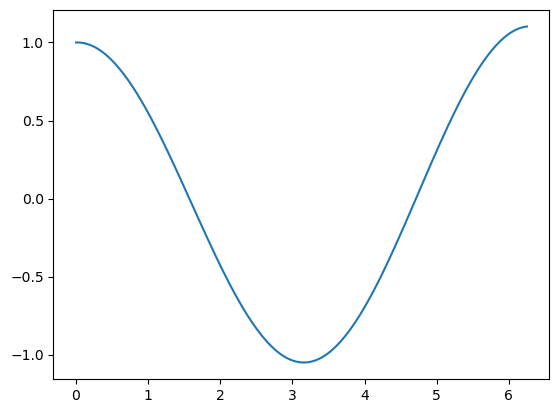

In [5]:
# Initial Parameters
N = 200 # Steps
OMEGA = 1. # Inital Omega Value
Z0 = complex(1., 0.) #Initial Value
dt = 2*np.pi / (N*OMEGA) # Time step for numerical solution
time = np.empty(N, float) # Time array (float)
z_vals = np.empty(N, complex) #Values of Z (complex valued)

time[0] = 0 # Intial value of time
z_vals[0] = Z0 #Intial value of Z0 = Z(0)

# Calculating numerical solution as Z(t + dt) = Z(t)*(1 + i OMEGA dt) from
# equation
for i in range(1, N):
    z_vals[i] = z_vals[i-1]*(1+1j*OMEGA*dt)
    time[i] = time[i-1]+dt
    
# Plotting solution (not required but left just incase)
plt.plot(time, z_vals)


## Part (b)
Using the code in the previous part, plot $|Z|(t)$ (absolute value of $Z$, as a function of $t$) for $n=200,Z_0=1,\omega=1$Hz . Is the result what you expected? Why?

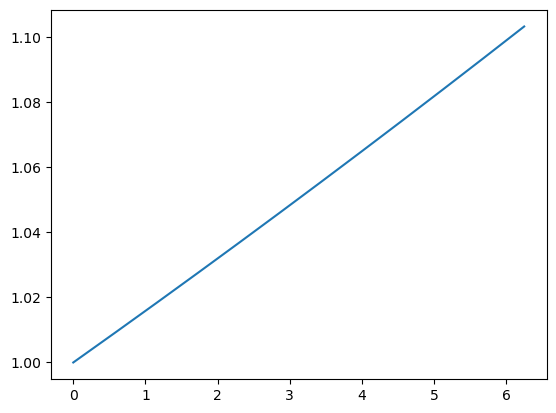

In [81]:
# Note that numpy absolute calculates absolute value element wise for array 
abs_z_vals = np.abs(z_vals)
# Plotting value
plt.plot(time, abs_z_vals)

This is not what is expected. Since the equation is essentially a rotation, you woudl expect the solution to go around the unit circle. However, as evident from the plot, the solution goes above a radius of 1.0